# Ensemble Learning and Bagging Techniques

## Table of Contents
1. [Introduction to Ensemble Learning](#introduction-to-ensemble-learning)
   - Intuition
   - Types of Ensemble Learning
   - Why it Works
   - Benefits of Ensemble
   - When to Use Ensemble
2. [Bagging Part 1 - Introduction](#bagging-part-1---introduction)
   - Core Idea
   - Why Use Bagging?
   - When to Use Bagging?
   - Code Demo
3. [Bagging Part 2 - Classifier](#bagging-part-2---classifier)
   - Intuition through Demo App
   - Code Demo
4. [Bagging Part 3 - Regressor](#bagging-part-3---regressor)
   - Core Idea
   - Code Demo

## Introduction to Ensemble Learning

### Importing Required Libraries

In [7]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, make_regression, load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set the style for better visualizations
plt.style.use('fivethirtyeight')
sns.set(style='whitegrid')

### Intuition

Ensemble learning is a machine learning technique that combines several base models to produce one optimal predictive model. Think of it as getting opinions from multiple experts rather than relying on just one person's judgment.


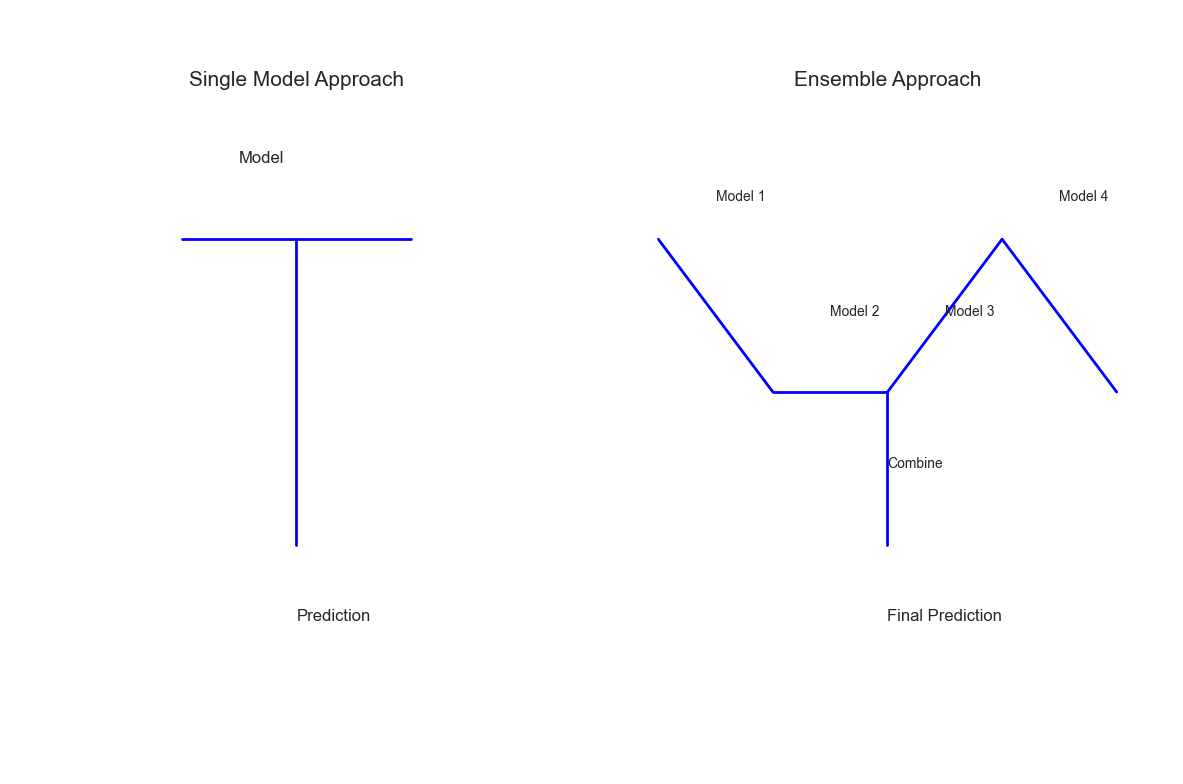

In [8]:
# Visualization to explain the intuition of ensemble learning
plt.figure(figsize=(12, 8))

# Create a simple diagram
plt.subplot(1, 2, 1)
plt.text(0.5, 0.9, 'Single Model Approach', horizontalalignment='center', fontsize=15)
plt.plot([0.3, 0.7], [0.7, 0.7], '-', linewidth=2, color='blue')
plt.plot([0.5, 0.5], [0.7, 0.3], '-', linewidth=2, color='blue')
plt.text(0.4, 0.8, 'Model', fontsize=12)
plt.text(0.5, 0.2, 'Prediction', fontsize=12)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.text(0.5, 0.9, 'Ensemble Approach', horizontalalignment='center', fontsize=15)
plt.plot([0.1, 0.3], [0.7, 0.5], '-', linewidth=2, color='blue')
plt.plot([0.3, 0.5], [0.5, 0.5], '-', linewidth=2, color='blue')
plt.plot([0.5, 0.7], [0.5, 0.7], '-', linewidth=2, color='blue')
plt.plot([0.7, 0.9], [0.7, 0.5], '-', linewidth=2, color='blue')
plt.plot([0.5, 0.5], [0.5, 0.3], '-', linewidth=2, color='blue')
plt.text(0.2, 0.75, 'Model 1', fontsize=10)
plt.text(0.4, 0.6, 'Model 2', fontsize=10)
plt.text(0.6, 0.6, 'Model 3', fontsize=10)
plt.text(0.8, 0.75, 'Model 4', fontsize=10)
plt.text(0.5, 0.4, 'Combine', fontsize=10)
plt.text(0.5, 0.2, 'Final Prediction', fontsize=12)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.axis('off')

plt.tight_layout()
plt.show()

### Types of Ensemble Learning

There are several ways to create ensemble models. Here are the most common approaches:

1. **Bagging (Bootstrap Aggregating)**:
   - Creates multiple versions of the same model on different samples
   - Reduces variance and helps avoid overfitting
   - Example: Random Forest

2. **Boosting**:
   - Builds models sequentially, where each model tries to correct errors from previous ones
   - Reduces bias and variance
   - Examples: AdaBoost, Gradient Boosting, XGBoost

3. **Stacking**:
   - Combines predictions from different models using another model
   - Uses the predictions of base models as features for a meta-model
   - Can combine diverse types of models

4. **Voting**:
   - Simple aggregation of predictions from multiple models
   - Hard voting: majority vote for classification
   - Soft voting: weighted average of probabilities for classification


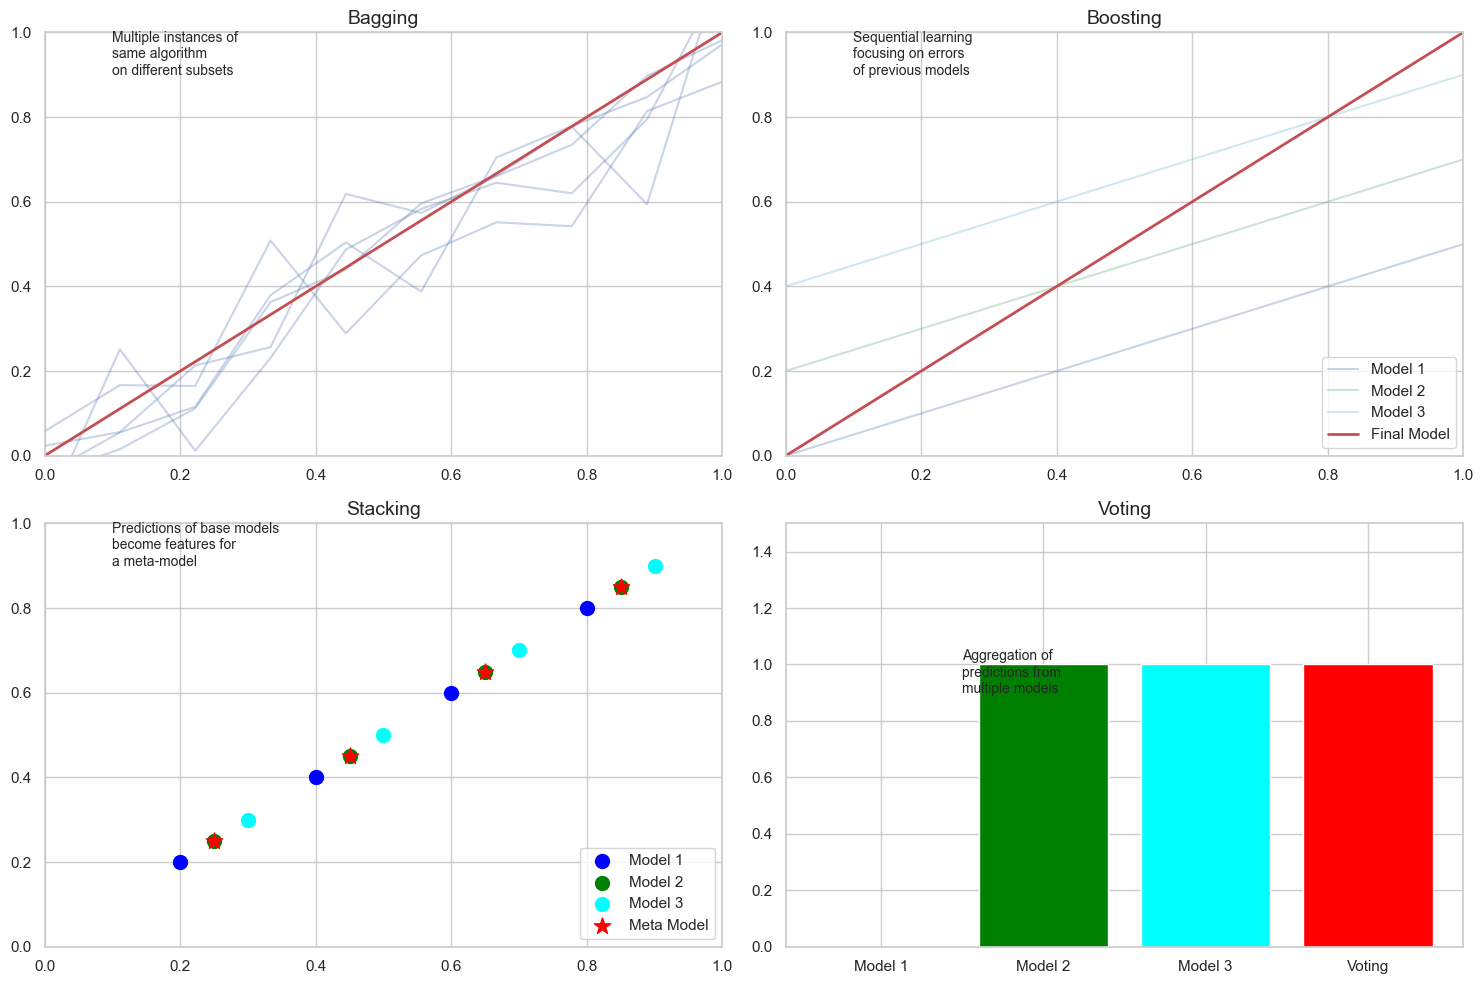

In [9]:
# Visual representation of different ensemble methods
plt.figure(figsize=(15, 10))

# Bagging
plt.subplot(2, 2, 1)
plt.title('Bagging', fontsize=14)
x = np.linspace(0, 1, 10)
for i in range(5):
    plt.plot(x, x + 0.1*np.random.randn(10), 'b-', alpha=0.3)
plt.plot(x, x, 'r-', linewidth=2)
plt.text(0.1, 0.9, 'Multiple instances of\nsame algorithm\non different subsets', fontsize=10)
plt.xlim(0, 1)
plt.ylim(0, 1)

# Boosting
plt.subplot(2, 2, 2)
plt.title('Boosting', fontsize=14)
x = np.linspace(0, 1, 10)
plt.plot(x, 0.5*x, 'b-', alpha=0.3, label='Model 1')
plt.plot(x, 0.5*x + 0.2, 'g-', alpha=0.3, label='Model 2')
plt.plot(x, 0.5*x + 0.4, 'c-', alpha=0.3, label='Model 3')
plt.plot(x, x, 'r-', linewidth=2, label='Final Model')
plt.text(0.1, 0.9, 'Sequential learning\nfocusing on errors\nof previous models', fontsize=10)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend(loc='lower right')

# Stacking
plt.subplot(2, 2, 3)
plt.title('Stacking', fontsize=14)
plt.scatter([0.2, 0.4, 0.6, 0.8], [0.2, 0.4, 0.6, 0.8], color='blue', s=100, label='Model 1')
plt.scatter([0.25, 0.45, 0.65, 0.85], [0.25, 0.45, 0.65, 0.85], color='green', s=100, label='Model 2')
plt.scatter([0.3, 0.5, 0.7, 0.9], [0.3, 0.5, 0.7, 0.9], color='cyan', s=100, label='Model 3')
plt.scatter([0.25, 0.45, 0.65, 0.85], [0.25, 0.45, 0.65, 0.85], color='red', s=150, marker='*', label='Meta Model')
plt.text(0.1, 0.9, 'Predictions of base models\nbecome features for\na meta-model', fontsize=10)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend(loc='lower right')

# Voting
plt.subplot(2, 2, 4)
plt.title('Voting', fontsize=14)
labels = ['Model 1', 'Model 2', 'Model 3', 'Voting']
predictions = [0, 1, 1, 1]
colors = ['blue', 'green', 'cyan', 'red']
plt.bar(labels, predictions, color=colors)
plt.text(0.5, 0.9, 'Aggregation of\npredictions from\nmultiple models', fontsize=10)
plt.ylim(0, 1.5)

plt.tight_layout()
plt.show()

### Why it Works?

Ensemble methods work due to three key principles:

1. **Statistical Reason**: By aggregating multiple models, you reduce the risk of selecting a single poor model. The "wisdom of crowds" principle shows that collective predictions are often better than individual ones.

2. **Computational Reason**: Multiple models started with different initializations may converge to different local optima, and their combination might be closer to the global optimum.

3. **Representational Reason**: The hypothesis space that can be represented by an ensemble may be larger than the space of a single model, allowing for more complex functions to be learned.


### Benefits of Ensemble

1. **Improved Accuracy**: Ensembles generally outperform individual models
2. **Reduced Overfitting**: By aggregating multiple models, the risk of overfitting decreases
3. **Robustness**: Less sensitive to noise and outliers
4. **Stability**: Provides more stable predictions across different datasets
5. **Better Handling of Class Imbalance**: Some ensemble methods work well with imbalanced data


Decision Tree: Mean Accuracy = 0.9280, Std Dev = 0.0327
Logistic Regression: Mean Accuracy = 0.9420, Std Dev = 0.0208
KNN: Mean Accuracy = 0.9298, Std Dev = 0.0293
Ensemble (Random Forest): Mean Accuracy = 0.9632, Std Dev = 0.0308


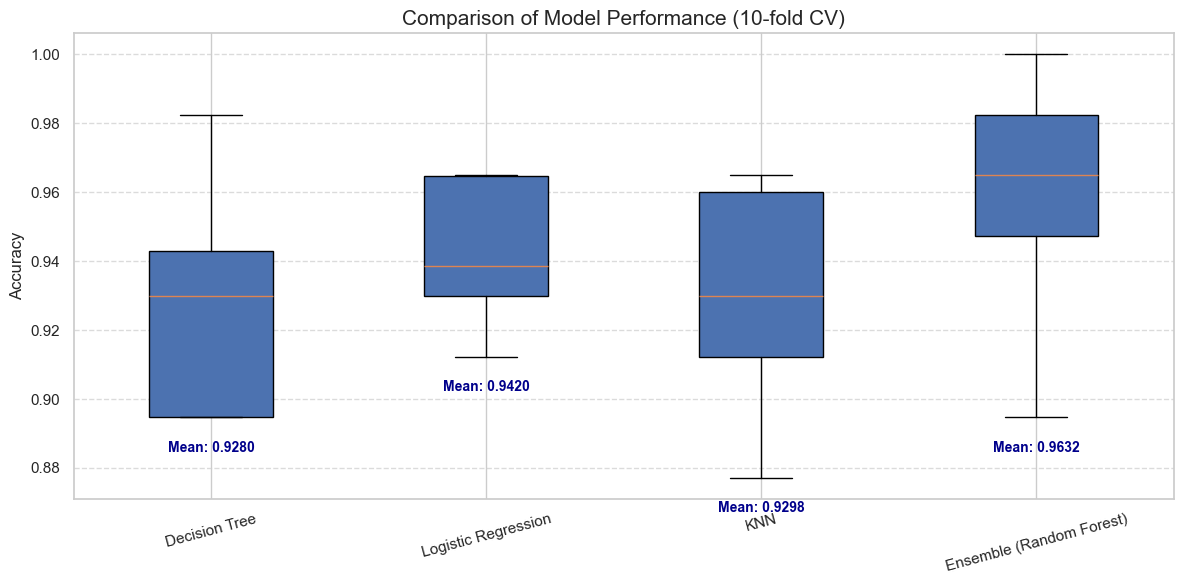

In [10]:
# Demonstrate the benefits of ensemble through a performance comparison
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score

# Load a more complex dataset
data = load_breast_cancer()
X = data.data
y = data.target

# List of base models and the ensemble
models = [
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('Ensemble (Random Forest)', RandomForestClassifier(n_estimators=100, random_state=42))
]

# Compare the performance using cross-validation
plt.figure(figsize=(12, 6))
box_data = []
names = []

for name, model in models:
    scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
    box_data.append(scores)
    names.append(name)
    print(f"{name}: Mean Accuracy = {scores.mean():.4f}, Std Dev = {scores.std():.4f}")

plt.boxplot(box_data, labels=names, patch_artist=True)
plt.title('Comparison of Model Performance (10-fold CV)', fontsize=15)
plt.ylabel('Accuracy')
plt.xticks(rotation=15)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

for i, data in enumerate(box_data, 1):
    plt.text(i, min(data)-0.01, f"Mean: {np.mean(data):.4f}", 
             horizontalalignment='center', size='small', color='darkblue', weight='semibold')

plt.tight_layout()
plt.show()

### When to Use Ensemble

Ensemble methods are particularly useful in the following scenarios:

1. **When accuracy is paramount**: If you need the highest possible predictive performance
2. **With noisy data**: When your dataset has noise or outliers
3. **Complex problems**: When the relationship between features and target is complex
4. **Imbalanced datasets**: Some ensemble methods handle class imbalance better
5. **When you have computational resources**: Ensembles require more computation than single models

However, there are also cases where ensembles might not be the best choice:

1. **When speed is critical**: Ensembles are slower in both training and prediction
2. **When interpretability is required**: Ensembles are less interpretable than simple models
3. **With limited computational resources**: They require more memory and processing power
4. **When the data is very simple**: Simple models might perform equally well with less complexity


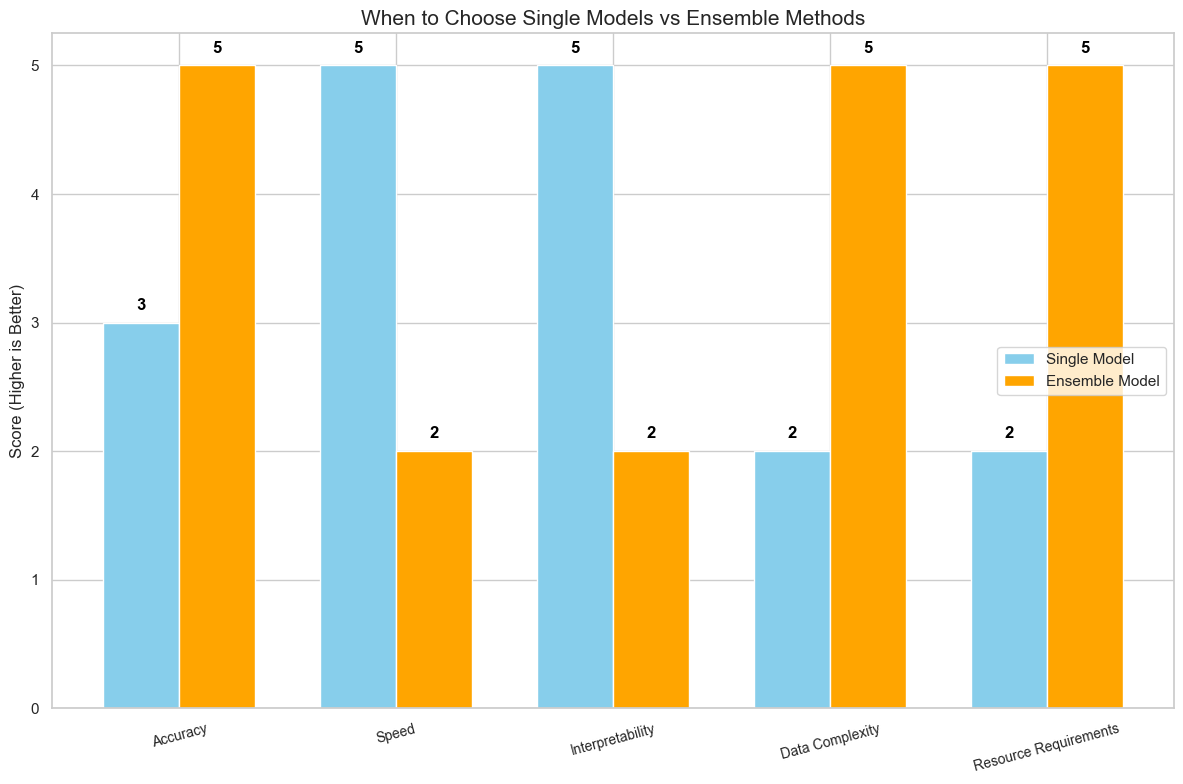

In [11]:
# Visualization to illustrate when to use ensemble methods
plt.figure(figsize=(12, 8))

# Create a table-like visualization
factors = ['Accuracy', 'Speed', 'Interpretability', 'Data Complexity', 'Resource Requirements']
single_scores = [3, 5, 5, 2, 2]  # Scores out of 5
ensemble_scores = [5, 2, 2, 5, 5]  # Scores out of 5

x = np.arange(len(factors))
width = 0.35

plt.bar(x - width/2, single_scores, width, label='Single Model', color='skyblue')
plt.bar(x + width/2, ensemble_scores, width, label='Ensemble Model', color='orange')

plt.ylabel('Score (Higher is Better)', fontsize=12)
plt.title('When to Choose Single Models vs Ensemble Methods', fontsize=15)
plt.xticks(x, factors, fontsize=10, rotation=15)
plt.yticks(np.arange(0, 6, 1))
plt.legend()

for i, v in enumerate(single_scores):
    plt.text(i - width/2, v + 0.1, str(v), color='black', fontweight='bold', ha='center')

for i, v in enumerate(ensemble_scores):
    plt.text(i + width/2, v + 0.1, str(v), color='black', fontweight='bold', ha='center')

plt.tight_layout()
plt.show()

## Bagging Part 1 - Introduction

### Core Idea

Bagging (Bootstrap Aggregating) is an ensemble technique that involves:

1. Creating multiple versions of a model by training each one on a random subset of the training data (with replacement)
2. Combining their predictions through averaging (for regression) or voting (for classification)

The key principle is that models trained on different subsets of data will make different errors, and by combining them, these errors tend to cancel out.


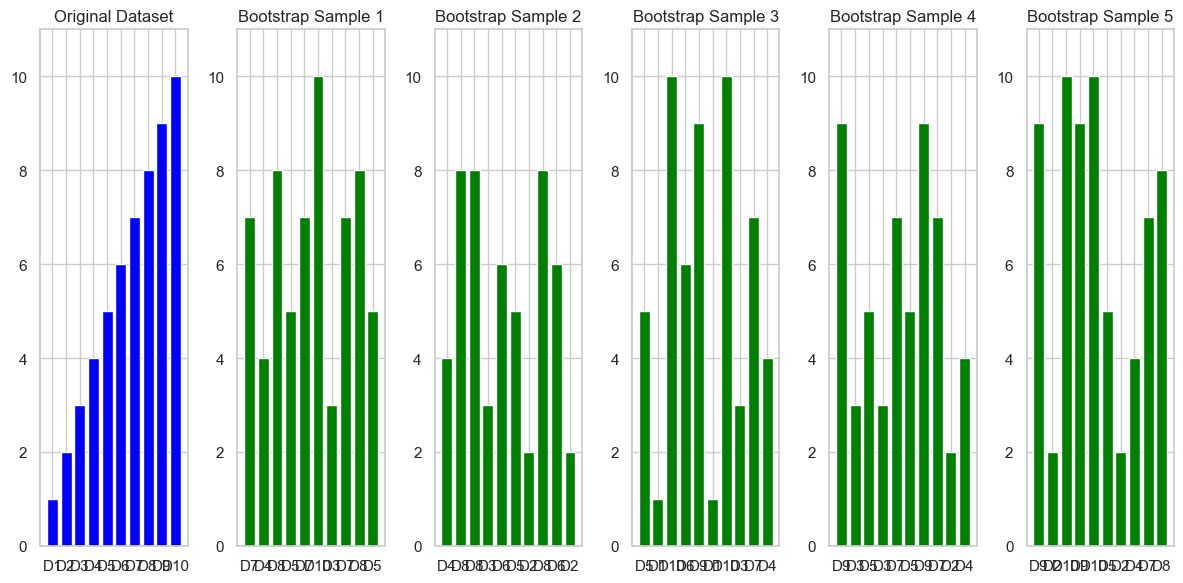

'In bagging, we create multiple datasets by sampling with replacement from the original dataset.'

In [22]:
# Illustration of the bootstrap sampling process in bagging
def illustrate_bootstrap():
    original_data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
    n_samples = len(original_data)
    n_bootstraps = 5
    
    plt.figure(figsize=(12, 6))
    
    # Plot original dataset
    plt.subplot(1, n_bootstraps+1, 1)
    plt.bar(range(n_samples), original_data, color='blue')
    plt.title('Original Dataset')
    plt.ylim(0, 11)
    plt.xticks(range(n_samples), [f"D{i+1}" for i in range(n_samples)])
    
    # Plot bootstrap samples
    np.random.seed(42)
    for i in range(n_bootstraps):
        bootstrap_indices = np.random.choice(n_samples, size=n_samples, replace=True)
        bootstrap_sample = original_data[bootstrap_indices]
        
        plt.subplot(1, n_bootstraps+1, i+2)
        plt.bar(range(n_samples), bootstrap_sample, color='green')
        plt.title(f'Bootstrap Sample {i+1}')
        plt.ylim(0, 11)
        plt.xticks(range(n_samples), [f"D{j+1}" for j in bootstrap_indices])
    
    plt.tight_layout()
    plt.show()
    
    # Return a description of what's happening
    return "In bagging, we create multiple datasets by sampling with replacement from the original dataset."

illustrate_bootstrap()

### Why Use Bagging?

Bagging offers several advantages:

1. **Reduces variance**: By training models on different subsets, it reduces the risk of overfitting
2. **Increases stability**: Small changes in the data don't lead to drastically different models
3. **Maintains bias**: Doesn't significantly change the bias of the base model
4. **Parallelizable**: Each model can be trained independently and in parallel


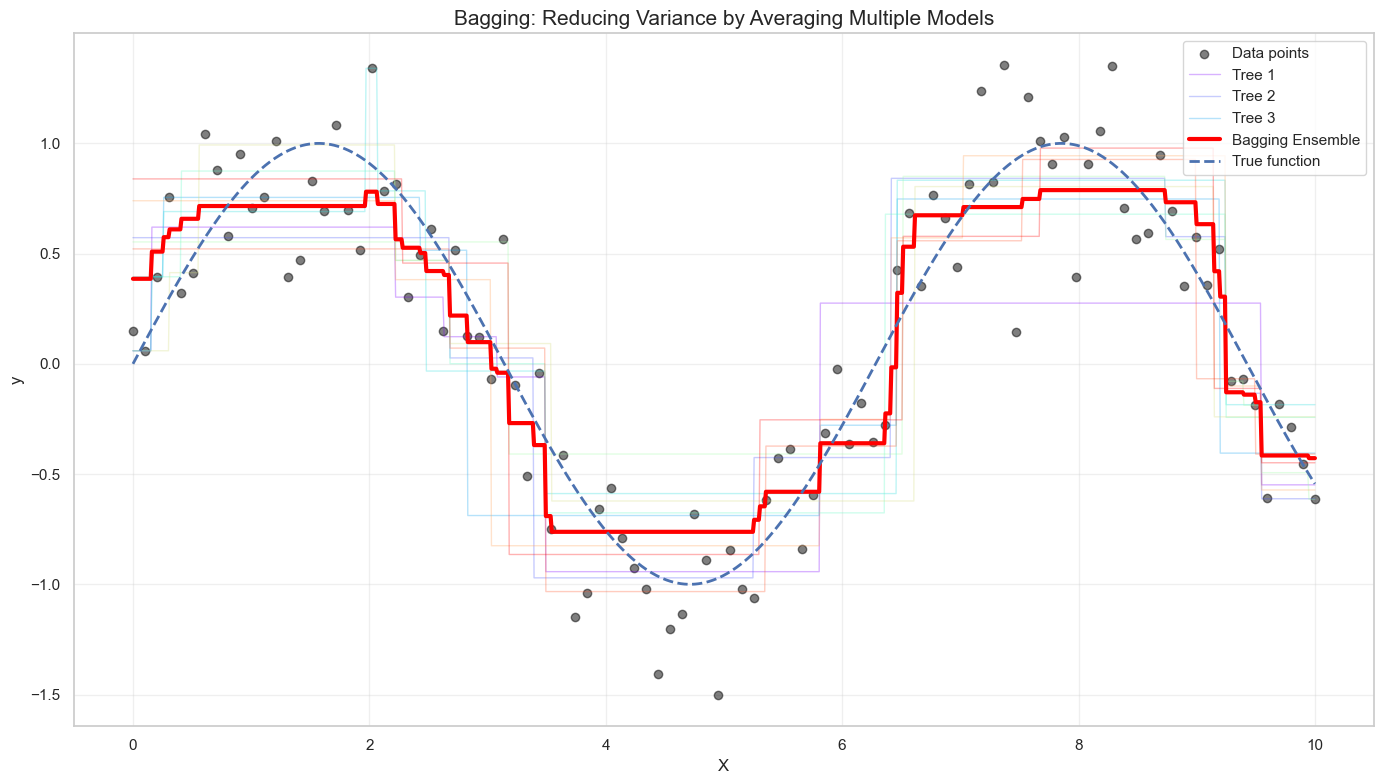

In [23]:
# Demonstrate how bagging reduces variance
np.random.seed(42)

# Generate synthetic data with noise
n_samples = 100
X = np.linspace(0, 10, n_samples).reshape(-1, 1)
y = np.sin(X.ravel()) + np.random.normal(0, 0.3, n_samples)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a function to plot models and their predictions
def plot_bagging_variance_reduction():
    plt.figure(figsize=(14, 8))
    
    # Plot the original data
    plt.scatter(X, y, color='black', alpha=0.5, label='Data points')
    
    # Train multiple decision tree regressors
    n_estimators = 10
    colors = plt.cm.rainbow(np.linspace(0, 1, n_estimators))
    x_test = np.linspace(0, 10, 1000).reshape(-1, 1)
    
    tree_predictions = []
    
    # Train and plot individual trees
    for i, color in enumerate(colors):
        # Create bootstrap sample
        bootstrap_indices = np.random.choice(len(X_train), size=len(X_train), replace=True)
        X_bootstrap = X_train[bootstrap_indices]
        y_bootstrap = y_train[bootstrap_indices]
        
        # Train a tree on the bootstrap sample
        tree = DecisionTreeRegressor(max_depth=3)
        tree.fit(X_bootstrap, y_bootstrap)
        
        # Get predictions
        y_pred = tree.predict(x_test)
        tree_predictions.append(y_pred)
        
        # Plot the tree's predictions
        plt.plot(x_test, y_pred, alpha=0.3, color=color, lw=1, label=f"Tree {i+1}" if i < 3 else "")
    
    # Compute and plot the average prediction (bagging result)
    y_bagging = np.mean(tree_predictions, axis=0)
    plt.plot(x_test, y_bagging, color='red', lw=3, label='Bagging Ensemble')
    
    # Plot the true function
    plt.plot(x_test, np.sin(x_test.ravel()), 'b--', lw=2, label='True function')
    
    plt.title('Bagging: Reducing Variance by Averaging Multiple Models', fontsize=15)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend(loc='upper right')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

plot_bagging_variance_reduction()

### When to Use Bagging?

Bagging is particularly effective in the following scenarios:

1. **With high-variance models**: Decision trees, neural networks, etc.
2. **When the dataset has noise**: It helps mitigate the effect of noisy observations
3. **When stability is important**: If you want consistent predictions across different runs
4. **With small to medium-sized datasets**: To extract maximum information from limited data

Bagging is less effective when:
1. **The base model has high bias**: Bagging primarily reduces variance, not bias
2. **With very large datasets**: The benefit of bootstrap sampling diminishes
3. **When interpretability is critical**: The ensemble is less interpretable than a single model


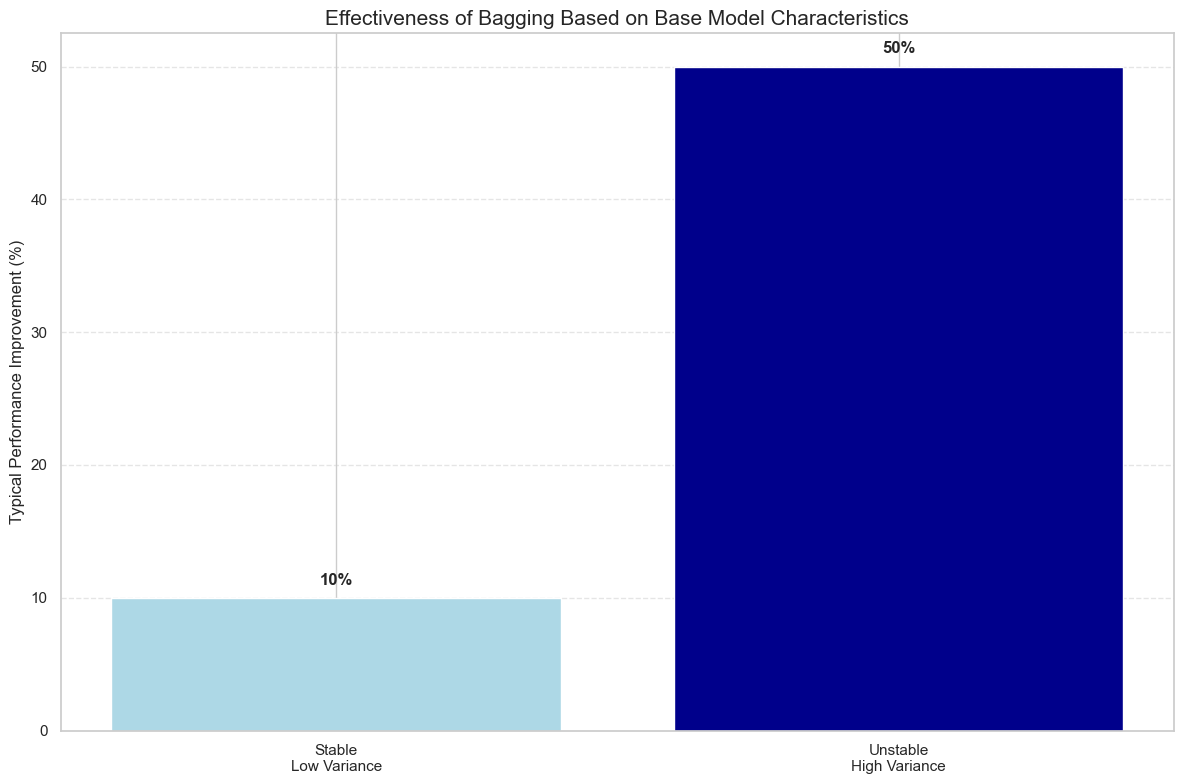

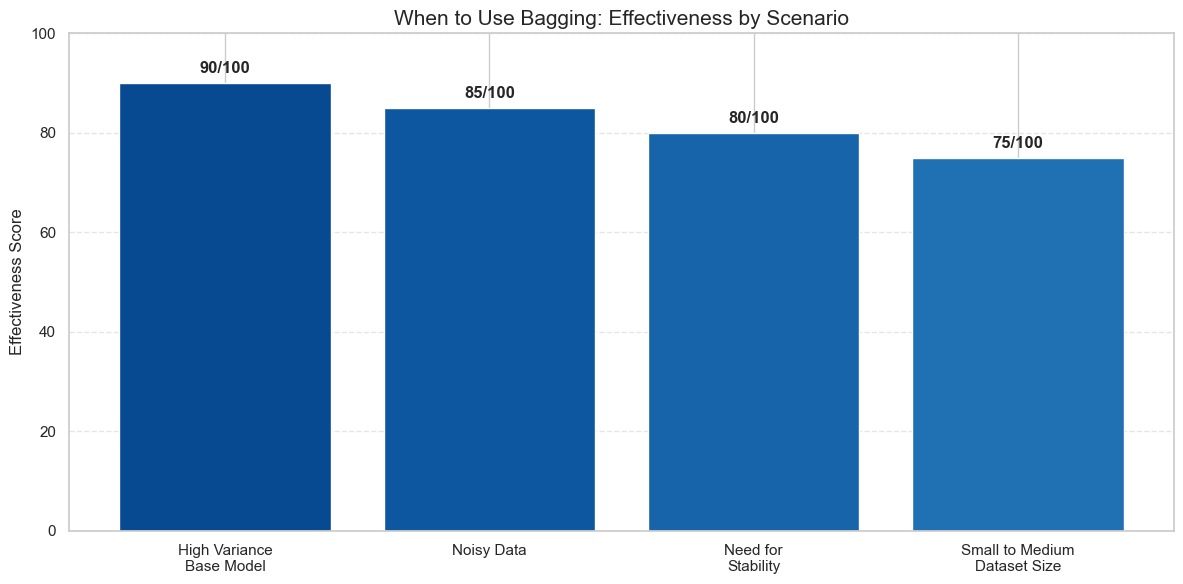

In [24]:
# Visualization to illustrate when bagging works best
plt.figure(figsize=(12, 8))

# Define the models to compare
model_types = ['Stable\nLow Variance', 'Unstable\nHigh Variance']
performance_gain = [10, 50]  # Hypothetical percentage improvement

# Create bar plot
plt.bar(model_types, performance_gain, color=['lightblue', 'darkblue'])
plt.title('Effectiveness of Bagging Based on Base Model Characteristics', fontsize=15)
plt.ylabel('Typical Performance Improvement (%)', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

for i, v in enumerate(performance_gain):
    plt.text(i, v + 1, f"{v}%", horizontalalignment='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Create a table-like visualization for when to use bagging
plt.figure(figsize=(12, 6))
scenarios = ['High Variance\nBase Model', 'Noisy Data', 'Need for\nStability', 'Small to Medium\nDataset Size']
effectiveness = [90, 85, 80, 75]  # Hypothetical effectiveness scores out of 100

# Create bar plot
plt.bar(scenarios, effectiveness, color=plt.cm.Blues(np.array(effectiveness)/100))
plt.title('When to Use Bagging: Effectiveness by Scenario', fontsize=15)
plt.ylabel('Effectiveness Score', fontsize=12)
plt.ylim(0, 100)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

for i, v in enumerate(effectiveness):
    plt.text(i, v + 2, f"{v}/100", horizontalalignment='center', fontweight='bold')

plt.tight_layout()
plt.show()

Let's implement a simple bagging ensemble to see how it works:


Single Decision Tree Accuracy: 0.7967
Bagging Ensemble Accuracy: 0.8833
Improvement: 10.88%


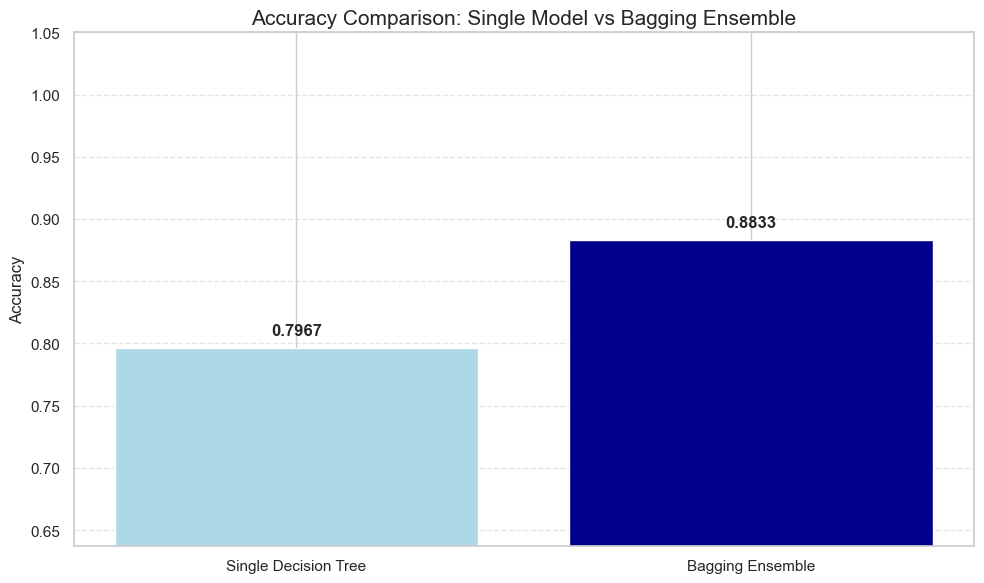

In [26]:
# Generate a synthetic dataset
np.random.seed(42)
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, 
                          n_redundant=5, random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a single decision tree
single_tree = DecisionTreeClassifier(random_state=42)
single_tree.fit(X_train, y_train)
y_pred_single = single_tree.predict(X_test)
single_accuracy = accuracy_score(y_test, y_pred_single)

# Train a bagging ensemble
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)
bagging.fit(X_train, y_train)
y_pred_bagging = bagging.predict(X_test)
bagging_accuracy = accuracy_score(y_test, y_pred_bagging)


# Print the results
print(f"Single Decision Tree Accuracy: {single_accuracy:.4f}")
print(f"Bagging Ensemble Accuracy: {bagging_accuracy:.4f}")
print(f"Improvement: {(bagging_accuracy - single_accuracy) / single_accuracy * 100:.2f}%")

# Create a bar chart comparing the accuracy
plt.figure(figsize=(10, 6))
plt.bar(['Single Decision Tree', 'Bagging Ensemble'], 
        [single_accuracy, bagging_accuracy],
        color=['lightblue', 'darkblue'])
plt.title('Accuracy Comparison: Single Model vs Bagging Ensemble', fontsize=15)
plt.ylabel('Accuracy')
plt.ylim(0.8 * min(single_accuracy, bagging_accuracy), 1.05)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

# Add the exact accuracy values on top of bars
for i, acc in enumerate([single_accuracy, bagging_accuracy]):
    plt.text(i, acc + 0.01, f"{acc:.4f}", horizontalalignment='center', fontweight='bold')

plt.tight_layout()
plt.show()

Now let's examine how the number of estimators affects performance:


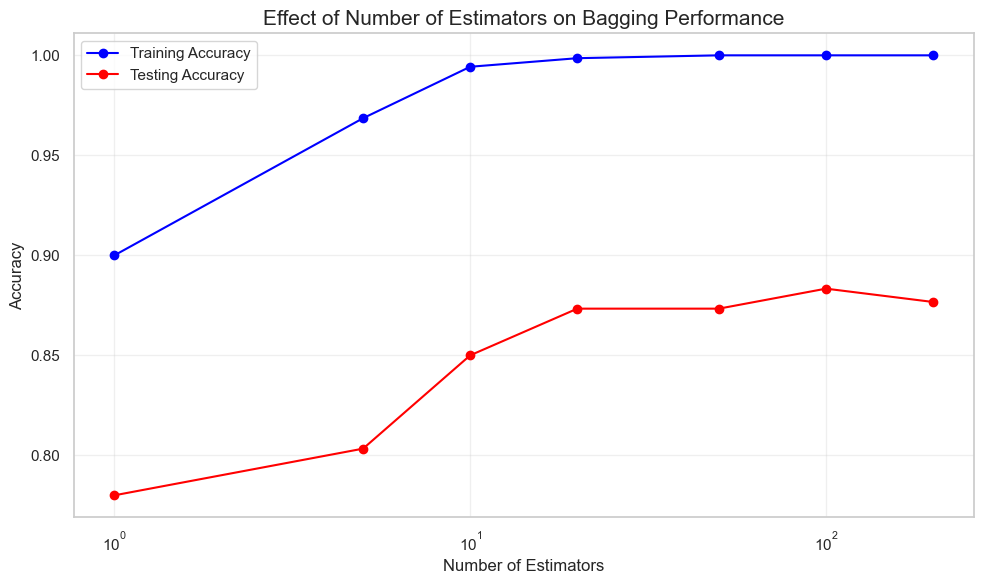

In [27]:
# Effect of the number of estimators
estimator_range = [1, 5, 10, 20, 50, 100, 200]
train_scores = []
test_scores = []

for n_estimators in estimator_range:
    bagging = BaggingClassifier(
        estimator=DecisionTreeClassifier(),
        n_estimators=n_estimators,
        random_state=42
    )
    bagging.fit(X_train, y_train)
    
    train_scores.append(accuracy_score(y_train, bagging.predict(X_train)))
    test_scores.append(accuracy_score(y_test, bagging.predict(X_test)))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(estimator_range, train_scores, 'o-', color='blue', label='Training Accuracy')
plt.plot(estimator_range, test_scores, 'o-', color='red', label='Testing Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Effect of Number of Estimators on Bagging Performance', fontsize=15)
plt.xscale('log')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

## Bagging Part 2 - Classifier




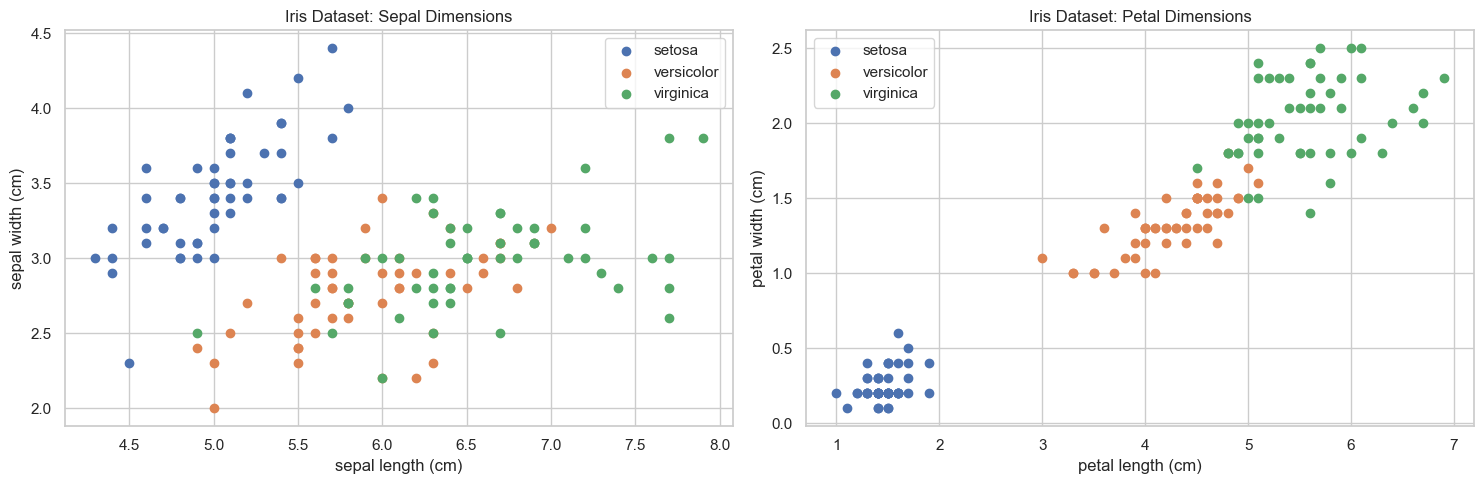

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



<Figure size 800x600 with 0 Axes>

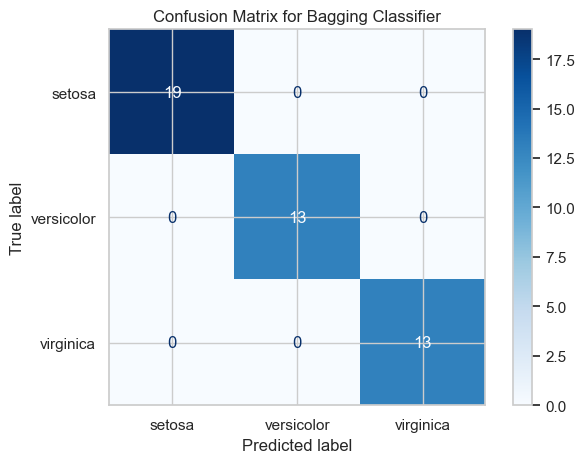

In [28]:
# Load the Iris dataset
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Visualize the dataset
plt.figure(figsize=(15, 5))

# First plot: sepal length vs sepal width
plt.subplot(1, 2, 1)
for i, target in enumerate(target_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], label=target)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title("Iris Dataset: Sepal Dimensions")
plt.legend()

# Second plot: petal length vs petal width
plt.subplot(1, 2, 2)
for i, target in enumerate(target_names):
    plt.scatter(X[y == i, 2], X[y == i, 3], label=target)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.title("Iris Dataset: Petal Dimensions")
plt.legend()

plt.tight_layout()
plt.show()

# Train a bagging classifier
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)
bagging.fit(X_train, y_train)

# Make predictions
y_pred = bagging.predict(X_test)

# Evaluate the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Visualize the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Bagging Classifier")
plt.tight_layout()
plt.show()

Let's explore how different parameters affect the performance of a bagging classifier:

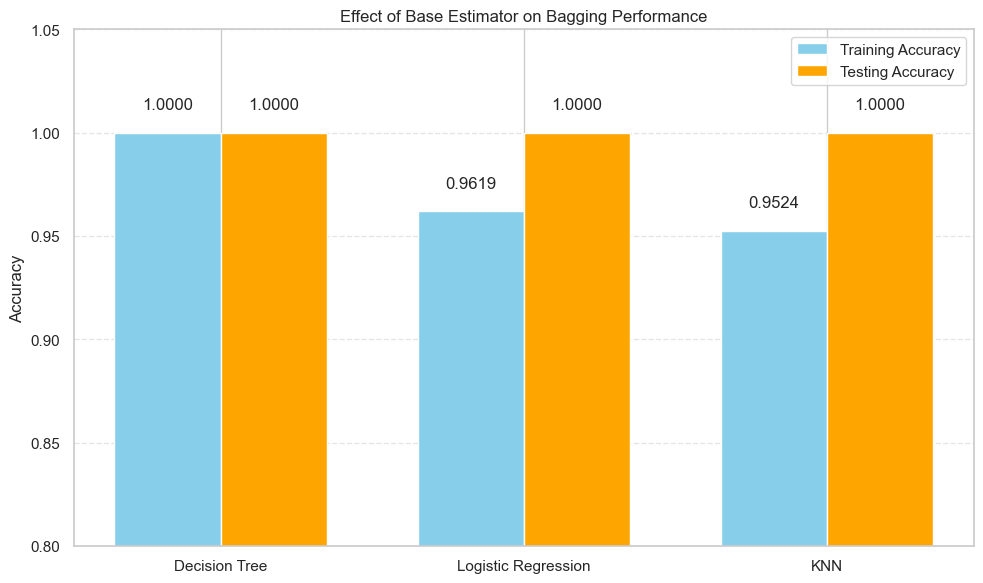

In [18]:
# Parameter tuning: Effect of different base estimators
base_estimators = [
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('KNN', KNeighborsClassifier(n_neighbors=3))
]

results = []

for name, estimator in base_estimators:
    bagging = BaggingClassifier(
        estimator=estimator,
        n_estimators=100,
        random_state=42
    )
    bagging.fit(X_train, y_train)
    train_score = accuracy_score(y_train, bagging.predict(X_train))
    test_score = accuracy_score(y_test, bagging.predict(X_test))
    results.append((name, train_score, test_score))

# Plot the results
plt.figure(figsize=(10, 6))
names = [r[0] for r in results]
train_scores = [r[1] for r in results]
test_scores = [r[2] for r in results]

x = np.arange(len(names))
width = 0.35

plt.bar(x - width/2, train_scores, width, label='Training Accuracy', color='skyblue')
plt.bar(x + width/2, test_scores, width, label='Testing Accuracy', color='orange')

plt.ylabel('Accuracy')
plt.title('Effect of Base Estimator on Bagging Performance')
plt.xticks(x, names)
plt.ylim(0.8, 1.05)
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

for i, score in enumerate(train_scores):
    plt.text(i - width/2, score + 0.01, f"{score:.4f}", ha='center', va='bottom')

for i, score in enumerate(test_scores):
    plt.text(i + width/2, score + 0.01, f"{score:.4f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Bagging Part 3 - Regressor

### Core Idea

The core idea of bagging for regression is similar to classification, but instead of voting, predictions from individual models are averaged to get the final prediction. This averaging helps to reduce variance and create a more stable model.


Let's apply bagging to a more realistic regression problem using the Boston Housing dataset:

Decision Tree:
  MSE: 0.5265
  R²: 0.5988
---
Bagging with Trees:
  MSE: 0.2567
  R²: 0.8044
---
Bagging with Linear Regression:
  MSE: 0.5300
  R²: 0.5962
---
Random Forest:
  MSE: 0.2563
  R²: 0.8047
---


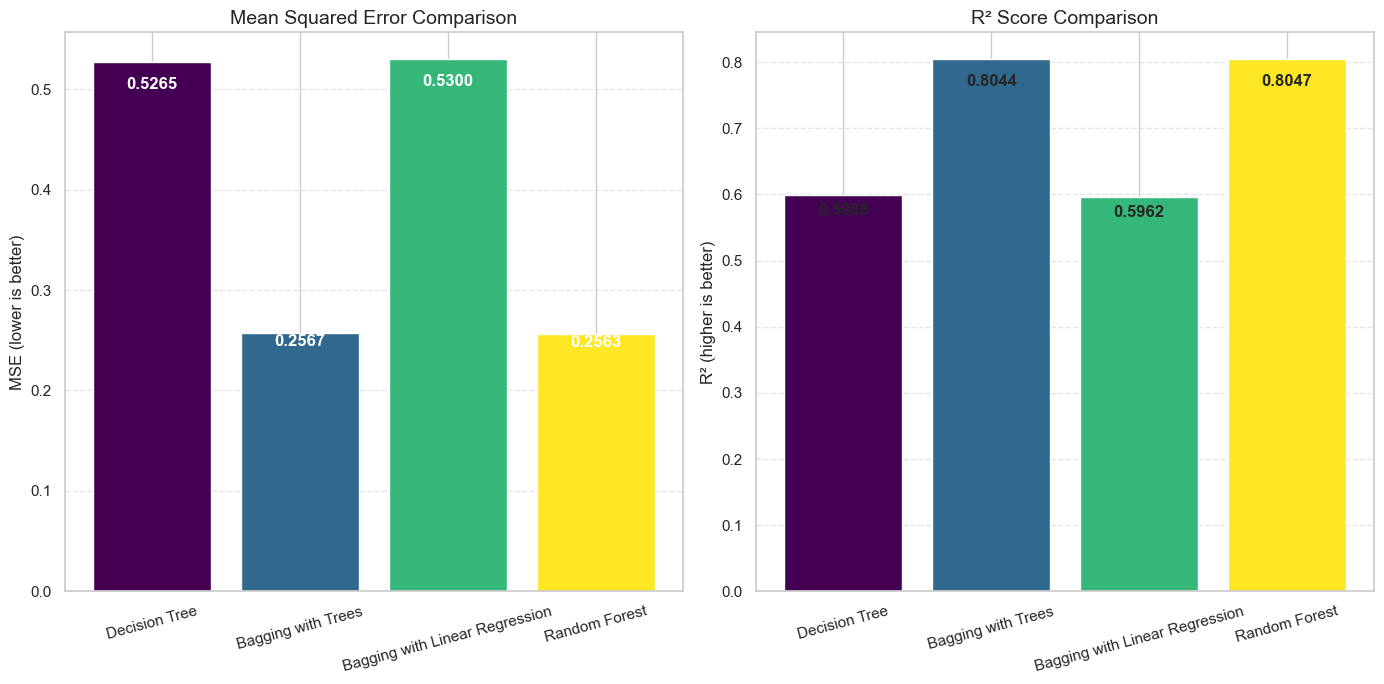

In [29]:
# Load the Boston Housing dataset (using a workaround since it's deprecated in sklearn)
# Alternatively you can use another regression dataset like diabetes
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing.data
y = housing.target
feature_names = housing.feature_names

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train different regression models
models = [
    ("Decision Tree", DecisionTreeRegressor(random_state=42)),
    ("Bagging with Trees", BaggingRegressor(
        estimator=DecisionTreeRegressor(),
        n_estimators=100,
        random_state=42
    )),
    ("Bagging with Linear Regression", BaggingRegressor(
        estimator=LinearRegression(),
        n_estimators=100,
        random_state=42
    )),
    ("Random Forest", RandomForestRegressor(n_estimators=100, random_state=42))
]

results = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append((name, mse, r2))
    print(f"{name}:")
    print(f"  MSE: {mse:.4f}")
    print(f"  R²: {r2:.4f}")
    print("---")

# Plot the results
plt.figure(figsize=(14, 7))

# MSE Comparison
plt.subplot(1, 2, 1)
names = [r[0] for r in results]
mse_scores = [r[1] for r in results]
plt.bar(names, mse_scores, color=plt.cm.viridis(np.linspace(0, 1, len(names))))
plt.title('Mean Squared Error Comparison', fontsize=14)
plt.ylabel('MSE (lower is better)')
plt.xticks(rotation=15)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

for i, mse in enumerate(mse_scores):
    plt.text(i, mse * 0.95, f"{mse:.4f}", horizontalalignment='center', fontweight='bold', color='white')

# R² Comparison
plt.subplot(1, 2, 2)
r2_scores = [r[2] for r in results]
plt.bar(names, r2_scores, color=plt.cm.viridis(np.linspace(0, 1, len(names))))
plt.title('R² Score Comparison', fontsize=14)
plt.ylabel('R² (higher is better)')
plt.xticks(rotation=15)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

for i, r2 in enumerate(r2_scores):
    plt.text(i, max(r2 * 0.95, 0.01), f"{r2:.4f}", horizontalalignment='center', fontweight='bold')

plt.tight_layout()
plt.show()


Let's explore the effect of different parameters on the bagging regressor:


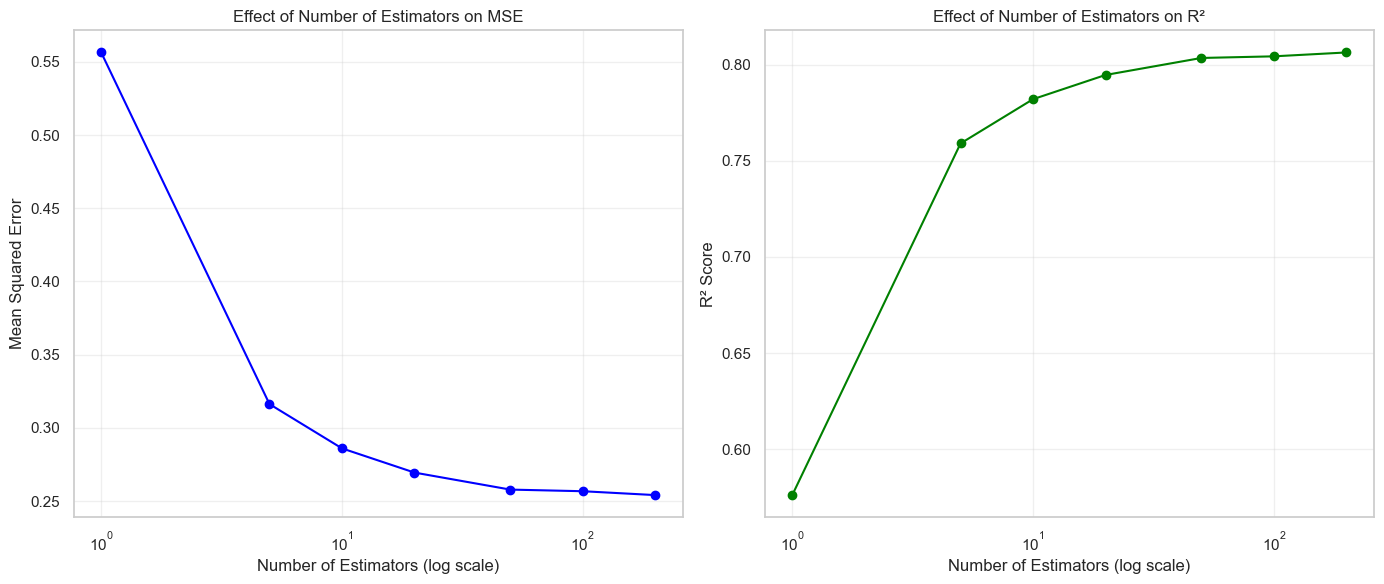

In [20]:

# Effect of the number of estimators
estimator_range = [1, 5, 10, 20, 50, 100, 200]
mse_scores = []
r2_scores = []

for n_estimators in estimator_range:
    bagging = BaggingRegressor(
        estimator=DecisionTreeRegressor(),
        n_estimators=n_estimators,
        random_state=42
    )
    bagging.fit(X_train, y_train)
    
    y_pred = bagging.predict(X_test)
    mse_scores.append(mean_squared_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

# Plot the results
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(estimator_range, mse_scores, 'o-', color='blue')
plt.xscale('log')
plt.xlabel('Number of Estimators (log scale)')
plt.ylabel('Mean Squared Error')
plt.title('Effect of Number of Estimators on MSE')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(estimator_range, r2_scores, 'o-', color='green')
plt.xscale('log')
plt.xlabel('Number of Estimators (log scale)')
plt.ylabel('R² Score')
plt.title('Effect of Number of Estimators on R²')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Summary and Conclusion

Here's a summary of what we've learned about ensemble learning and bagging:

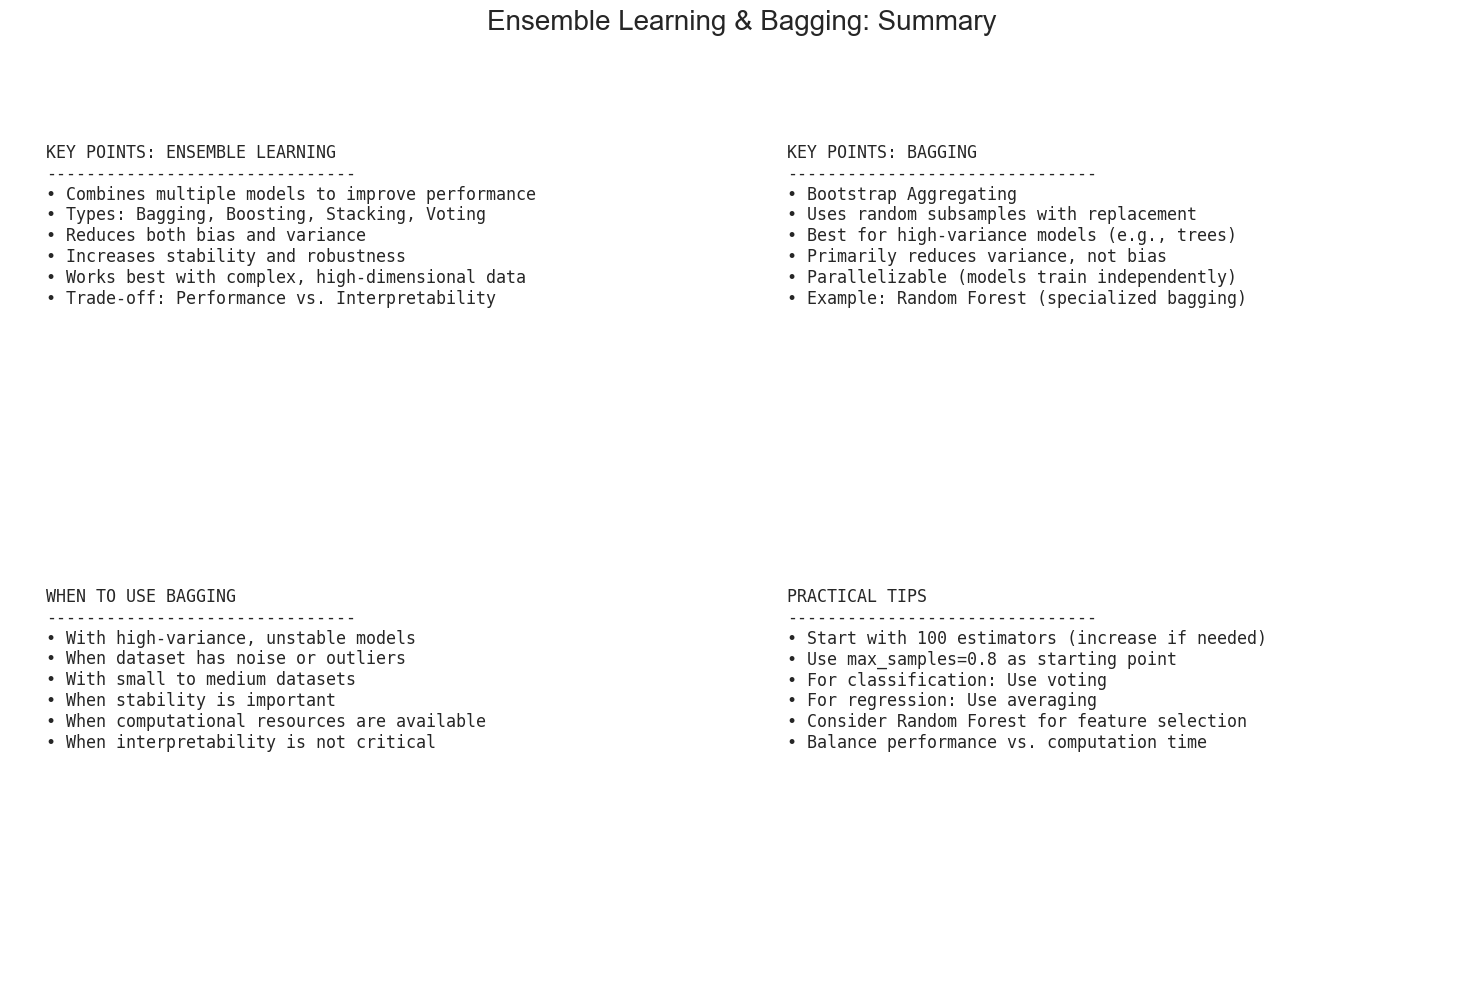

In [21]:
# Create a visual summary
plt.figure(figsize=(15, 10))

# Title
plt.suptitle('Ensemble Learning & Bagging: Summary', fontsize=20, y=0.98)

# First summary box
plt.subplot(2, 2, 1)
plt.axis('off')
summary_text = """
KEY POINTS: ENSEMBLE LEARNING
-------------------------------
• Combines multiple models to improve performance
• Types: Bagging, Boosting, Stacking, Voting
• Reduces both bias and variance
• Increases stability and robustness
• Works best with complex, high-dimensional data
• Trade-off: Performance vs. Interpretability
"""
plt.text(0.05, 0.95, summary_text, fontsize=12, va='top', family='monospace')

# Second summary box
plt.subplot(2, 2, 2)
plt.axis('off')
summary_text = """
KEY POINTS: BAGGING
-------------------------------
• Bootstrap Aggregating
• Uses random subsamples with replacement
• Best for high-variance models (e.g., trees)
• Primarily reduces variance, not bias
• Parallelizable (models train independently)
• Example: Random Forest (specialized bagging)
"""
plt.text(0.05, 0.95, summary_text, fontsize=12, va='top', family='monospace')

# Third summary box
plt.subplot(2, 2, 3)
plt.axis('off')
summary_text = """
WHEN TO USE BAGGING
-------------------------------
• With high-variance, unstable models
• When dataset has noise or outliers
• With small to medium datasets
• When stability is important
• When computational resources are available
• When interpretability is not critical
"""
plt.text(0.05, 0.95, summary_text, fontsize=12, va='top', family='monospace')

# Fourth summary box
plt.subplot(2, 2, 4)
plt.axis('off')
summary_text = """
PRACTICAL TIPS
-------------------------------
• Start with 100 estimators (increase if needed)
• Use max_samples=0.8 as starting point
• For classification: Use voting
• For regression: Use averaging
• Consider Random Forest for feature selection
• Balance performance vs. computation time
"""
plt.text(0.05, 0.95, summary_text, fontsize=12, va='top', family='monospace')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Thank you for participating in this class on Ensemble Learning and Bagging techniques. We've covered the intuition, types, benefits, and implementation details of ensemble methods, with a special focus on bagging for both classification and regression tasks.

**Key Takeaways:**

1. Ensemble learning combines multiple models to achieve better performance than any single model.
2. Bagging uses bootstrap samples to create diverse models and reduces variance.
3. Bagging works particularly well with high-variance models like decision trees.
4. Random Forest is a specialized form of bagging that introduces additional randomness.
5. Ensemble methods trade off some interpretability for improved predictive performance.

Remember to experiment with different parameters like the number of estimators and sample size to find the optimal configuration for your specific problem.